# Plotting with Pandas

## Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

## Basic bar plot

In [26]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.101234,-0.230062,-0.555974,0.644507
1,1.558511,-0.563322,2.013391,0.616906
2,1.087755,-0.214054,0.132832,-0.439746
3,-0.097110,-0.215825,0.005041,-0.691587
4,-1.330556,0.733612,0.378003,0.509820
5,0.118439,0.799986,1.652341,-0.058910
6,-0.132060,0.938188,-2.078806,-0.328931
7,0.652268,-0.076898,-0.777068,0.736814
8,1.653096,-0.093681,-0.231470,0.758251
9,-0.397775,-0.203224,0.078070,1.429571


**Explanation:** An easy way to make a test dataframe to start playing with things: use "numpy.random.randn" to generate random numbers, name the columns, and you're off!

## Bar plots

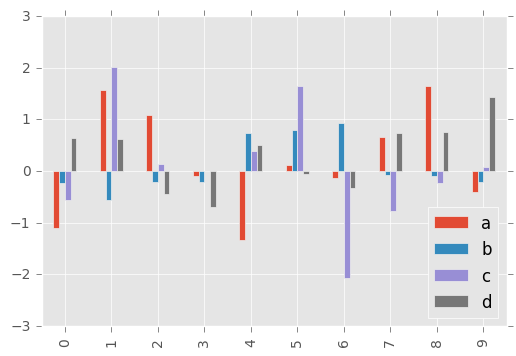

In [27]:
df.plot(kind='bar')
plt.show()

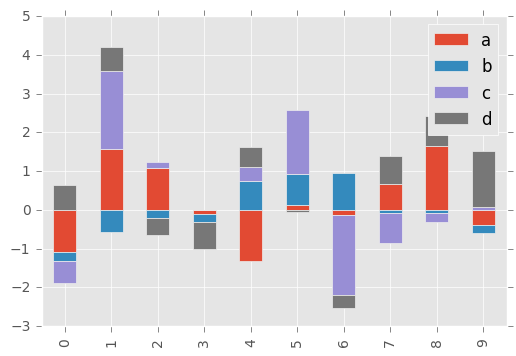

In [28]:
df.plot(kind='bar', stacked=True)
plt.show()

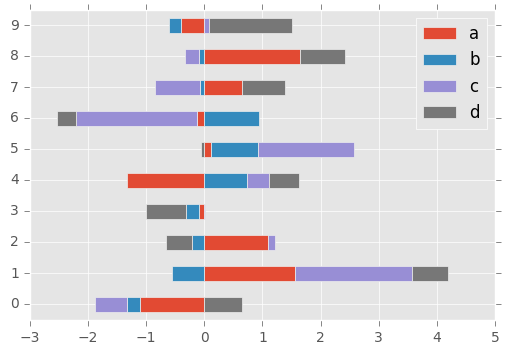

In [29]:
df.plot(kind='barh', stacked=True)
plt.show()

### Example: reading documentation

Open the documentation here: http://matplotlib.org/api/pyplot_api.html. Search for "matplotlib.pyplot.bar". You can see some of the arguments that you can change to affect your visualizations.

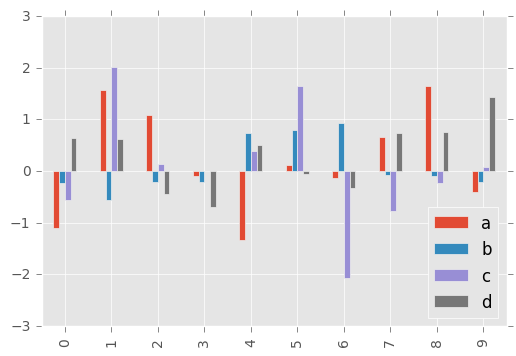

In [35]:
df.plot(kind='bar')
plt.show()

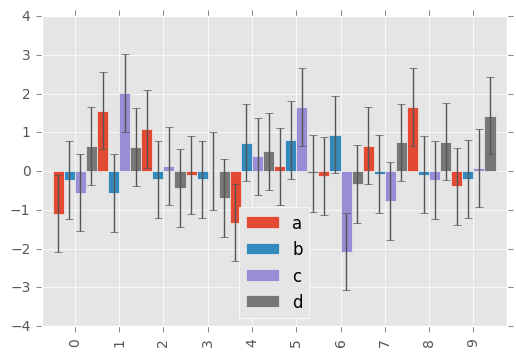

In [38]:
df.plot(kind='bar', width=1, yerr=True)
plt.show()

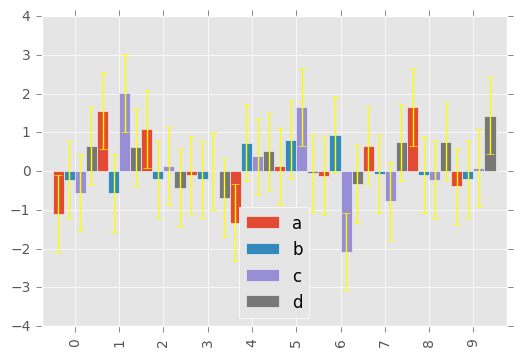

In [39]:
df.plot(kind='bar', width=1, yerr=True, ecolor='yellow')
plt.show()

## Interactive, Slack-based exercise

You can plot many other kinds of based plots by changing the value in the "kind" argument. Search for the text "kind" in the following link to see examples of the kinds of plots you can create: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Once you've identified a "kind" of plot you'd like to make, you can search this link for an extensive list of all the options that come with each plot. For example, for the options that come with the "kind=hist" plot (a histogram), you can find all the arguments in the documentation about halfway down the page where it says "matploblib.pyplot.hist": http://matplotlib.org/api/pyplot_api.html

Take **15 minutes** and see what kinds of visualizations you can create. _Post the code and the visualization you create in Slack_. After 10 minutes we'll discuss!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109377450>], dtype=object)

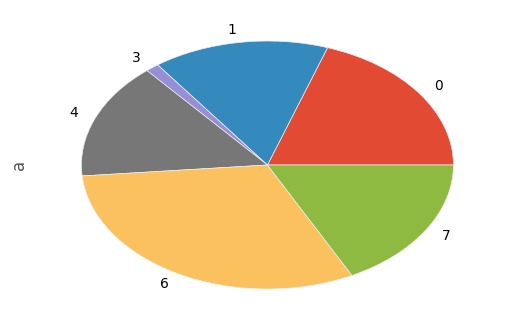

In [17]:
df[df.a > 0].a.plot(kind='pie', subplots=True)

**Explanation:** Here's a fun one to get you started. I subsetted only the values of the column "a" that are greater than 0, and made a pie chart - which is a terrible visualization to use! (anyone know why?)

## More Examples

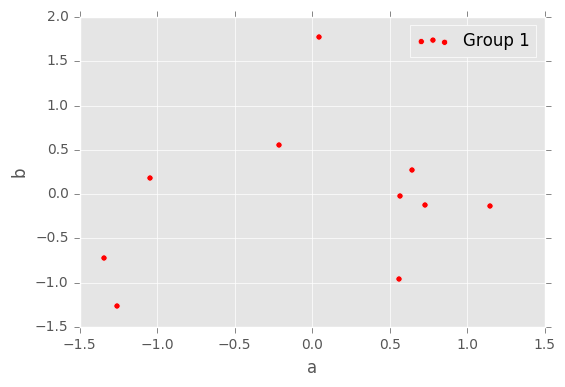

In [18]:
ax = df.plot(kind='scatter', x='a', y='b',
             color='Red', label='Group 1');

In [20]:
df['c_positive'] = df['c'] > 0

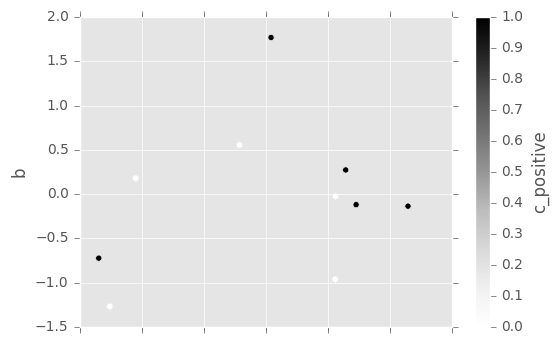

In [23]:
ax = df.plot(kind='scatter', x='a', y='b',
             c='c_positive');

## Time series data

#### Initialize a data frame

In [42]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
'2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
'2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
'2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
'2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
df

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


#### Convert date to "datetime" and then delete the column

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [45]:
df.resample('D', how='sum')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


,battle_deaths
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103


In [ ]:
df.resample('D', how='sum')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


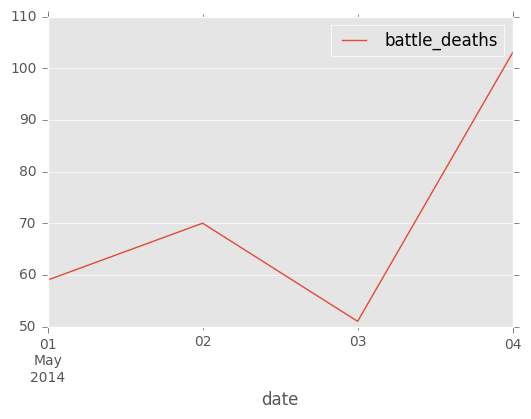

In [48]:
df.resample('D', how='sum').plot()

### Exercise - plotting time series data

Use some of the plotting techniques we just discussed to modify this plot. You can change the "kind" argument or look in the pyplot documentation (search for "matplotlib.pyplot.plot" on the page).

Take 5 minutes to do this, 5 minutes to share with your neighbor, and then we'll take 5 minutes to share as a class.

# Final exercise: putting it all together

In [50]:
df = pd.read_excel("./sales-funnel.xlsx")
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


## Exercise #1: Create a bar plot of Rep and Price

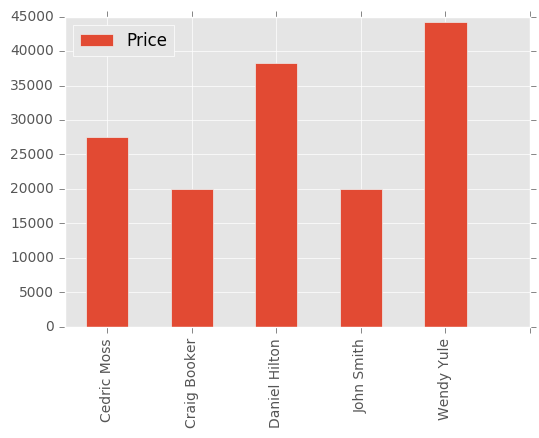

In [73]:
pivot = df.pivot_table(index=['Rep'],
               values=['Price'], 
               )
pivot2 = pivot.reset_index()

pivot2.plot(kind='bar', stacked=True)
plt.xticks( range(6), pivot2.Rep)
plt.show()

## Exercise #2: Create a stacked bar plot of Rep and Price, grouped by Status

Your code here

In [81]:
pivot = df.pivot_table(index=['Status'],
                       columns=['Rep'],
                       values=['Price'], 
               ).fillna(value=0)
# pivot2 = pivot.reset_index()
pivot

Price                                                 
Rep       Cedric Moss Craig Booker Daniel Hilton John Smith Wendy Yule
Status                                                                
declined          0.0      35000.0           0.0    35000.0    65000.0
pending        5000.0       5000.0       40000.0     5000.0        0.0
presented     20000.0      20000.0       10000.0        0.0     5000.0
won           65000.0          0.0       65000.0        0.0    53500.0

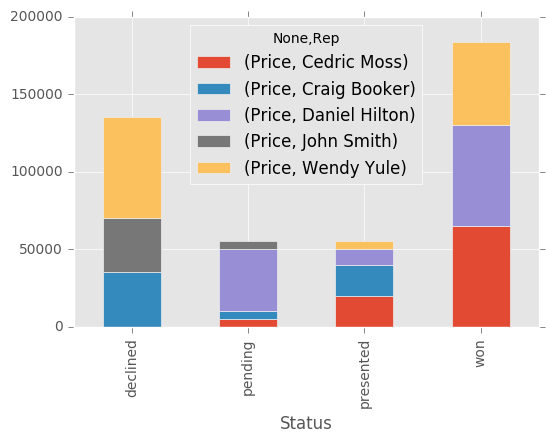

In [82]:
pivot.plot(kind='bar', stacked=True)
# plt.xticks( range(6), pivot2.Rep)
plt.show()